In [4]:
from sklearn.datasets import load_diabetes
df=load_diabetes()
df

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [5]:
import pandas as pd
df1=pd.DataFrame(df.data,df.target,columns=df.feature_names)
df1.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
151.0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
75.0,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
141.0,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
206.0,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
135.0,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [6]:
df1['target']=df.target
df1.shape

(442, 11)

In [7]:
df1.columns


Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6',
       'target'],
      dtype='object')

In [8]:
df1.isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of          age    sex    bmi     bp     s1     s2     s3     s4     s5     s6  \
151.0  False  False  False  False  False  False  False  False  False  False   
75.0   False  False  False  False  False  False  False  False  False  False   
141.0  False  False  False  False  False  False  False  False  False  False   
206.0  False  False  False  False  False  False  False  False  False  False   
135.0  False  False  False  False  False  False  False  False  False  False   
...      ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
178.0  False  False  False  False  False  False  False  False  False  False   
104.0  False  False  False  False  False  False  False  False  False  False   
132.0  False  False  False  False  False  False  False  False  False  False   
220.0  False  False  False  False  False  False  False  False  False  False   
57.0   False  False  False  False  False  False  False  False  False 

In [9]:
import pandas as pd

columns_to_remove_outliers = ['age','sex','bmi','bp','s1','s2','s3','s4','s5','s6']

for column in columns_to_remove_outliers:
    Q1 = df1[column].quantile(0.25)
    Q3 = df1[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df2 = df1[(df1[column] >= lower_bound) & (df1[column] <= upper_bound)]
df2.shape

(433, 11)

In [10]:
corr=df2.corr()
corr.shape

(11, 11)

<AxesSubplot: >

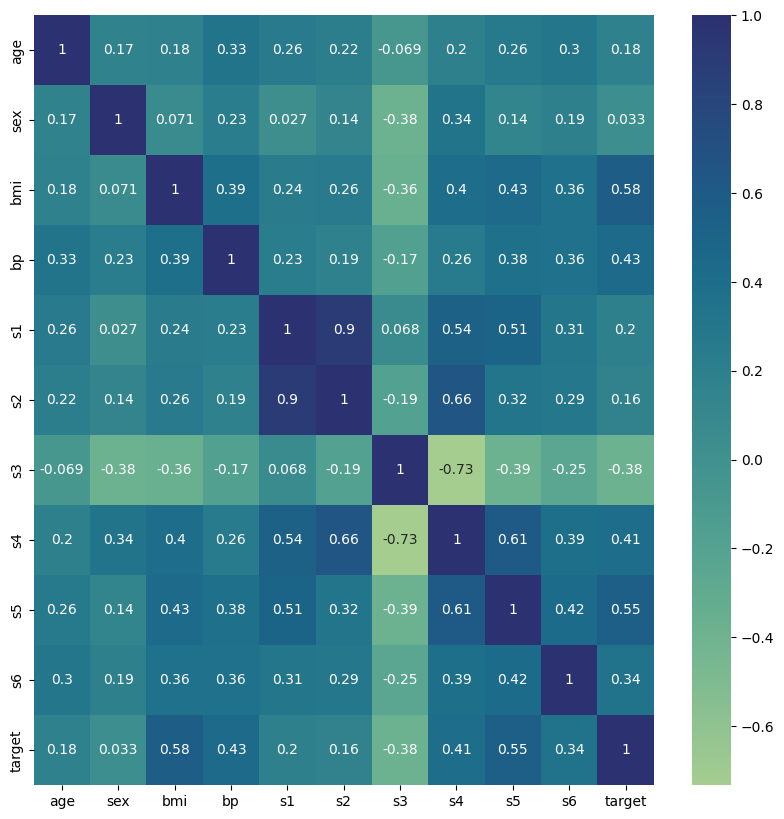

In [11]:
from matplotlib import pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True,cbar=True,cmap='crest')

In [12]:
x=df2.drop(['target'],axis='columns')
x.shape

(433, 10)

In [13]:
y=df2.target
y.shape

(433,)

In [14]:
from sklearn.model_selection import train_test_split
x_train, x__test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [15]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
model.fit(x_train,y_train)
model.score(x_train,y_train)

1.0

In [16]:
from sklearn import svm

from sklearn.model_selection import GridSearchCV
clf=GridSearchCV(svm.SVC(),{
    'kernel':['linear','poly','rbf','sigmoid'],
    'gamma':['auto','scale']
},cv=5,return_train_score=False)
clf.fit(x_train,y_train)
clf.cv_results_

C:\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


{'mean_fit_time': array([0.06061354, 0.0590209 , 0.04965291, 0.05403976, 0.075845  ,
        0.07063422, 0.06538363, 0.07451315]),
 'std_fit_time': array([0.00941427, 0.00372419, 0.00525088, 0.00663501, 0.0141757 ,
        0.00429688, 0.00724463, 0.01624786]),
 'mean_score_time': array([0.01101375, 0.00967708, 0.01043072, 0.00916638, 0.01486464,
        0.01042566, 0.01112728, 0.01330795]),
 'std_score_time': array([0.00224087, 0.00106851, 0.00188178, 0.00234716, 0.00392034,
        0.00110338, 0.00063543, 0.00239857]),
 'param_gamma': masked_array(data=['auto', 'auto', 'auto', 'auto', 'scale', 'scale',
                    'scale', 'scale'],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_kernel': masked_array(data=['linear', 'poly', 'rbf', 'sigmoid', 'linear', 'poly',
                    'rbf', 'sigmoid'],
              mask=[False, False, False, False, False, False, False, False],
        fill_va

In [18]:

dfn=pd.DataFrame(clf.cv_results_)
dfn

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_gamma,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.060614,0.009414,0.011014,0.002241,auto,linear,"{'gamma': 'auto', 'kernel': 'linear'}",0.000000,0.017241,0.000000,0.017241,0.017241,0.010345,0.008447,1
1,0.059021,0.003724,0.009677,0.001069,auto,poly,"{'gamma': 'auto', 'kernel': 'poly'}",0.000000,0.017241,0.000000,0.017241,0.017241,0.010345,0.008447,1
2,0.049653,0.005251,0.010431,0.001882,auto,rbf,"{'gamma': 'auto', 'kernel': 'rbf'}",0.000000,0.017241,0.000000,0.017241,0.017241,0.010345,0.008447,1
3,0.054040,0.006635,0.009166,0.002347,auto,sigmoid,"{'gamma': 'auto', 'kernel': 'sigmoid'}",0.000000,0.017241,0.000000,0.017241,0.017241,0.010345,0.008447,1
4,0.075845,0.014176,0.014865,0.003920,scale,linear,"{'gamma': 'scale', 'kernel': 'linear'}",0.000000,0.017241,0.000000,0.017241,0.017241,0.010345,0.008447,1
5,0.070634,0.004297,0.010426,0.001103,scale,poly,"{'gamma': 'scale', 'kernel': 'poly'}",0.017241,0.017241,0.000000,0.017241,0.000000,0.010345,0.008447,1
6,0.065384,0.007245,0.011127,0.000635,scale,rbf,"{'gamma': 'scale', 'kernel': 'rbf'}",0.017241,0.017241,0.000000,0.000000,0.000000,0.006897,0.008447,7
7,0.074513,0.016248,0.013308,0.002399,scale,sigmoid,"{'gamma': 'scale', 'kernel': 'sigmoid'}",0.000000,0.000000,0.017241,0.000000,0.000000,0.003448,0.006897,8


In [21]:
dfn[['param_kernel','param_gamma','params','params','rank_test_score']]

,param_kernel,param_gamma,params,params,rank_test_score
0,linear,auto,"{'gamma': 'auto', 'kernel': 'linear'}","{'gamma': 'auto', 'kernel': 'linear'}",1
1,poly,auto,"{'gamma': 'auto', 'kernel': 'poly'}","{'gamma': 'auto', 'kernel': 'poly'}",1
2,rbf,auto,"{'gamma': 'auto', 'kernel': 'rbf'}","{'gamma': 'auto', 'kernel': 'rbf'}",1
3,sigmoid,auto,"{'gamma': 'auto', 'kernel': 'sigmoid'}","{'gamma': 'auto', 'kernel': 'sigmoid'}",1
4,linear,scale,"{'gamma': 'scale', 'kernel': 'linear'}","{'gamma': 'scale', 'kernel': 'linear'}",1
5,poly,scale,"{'gamma': 'scale', 'kernel': 'poly'}","{'gamma': 'scale', 'kernel': 'poly'}",1
6,rbf,scale,"{'gamma': 'scale', 'kernel': 'rbf'}","{'gamma': 'scale', 'kernel': 'rbf'}",7
7,sigmoid,scale,"{'gamma': 'scale', 'kernel': 'sigmoid'}","{'gamma': 'scale', 'kernel': 'sigmoid'}",8
